<h1 align="center">Artificial Intelligence</h1>

<h3>Graph Representation</h3>

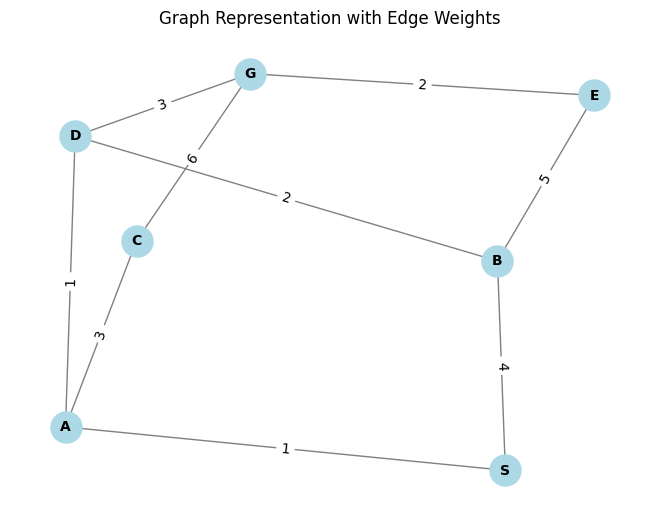

Node  Heuristic Value
   S                7
   A                6
   B                5
   C                3
   D                4
   E                2
   G                0


In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd

graph = { 
    'S': [('A', 1), ('B', 4)], 
    'A': [('C', 3), ('D', 1)], 
    'B': [('D', 2), ('E', 5)], 
    'C': [('G', 6)], 
    'D': [('G', 3)], 
    'E': [('G', 2)], 
    'G': []
} 

G = nx.Graph()

for node, neighbors in graph.items():
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Representation with Edge Weights")
plt.show()

heuristic = { 
    'S': 7, 'A': 6, 'B': 5, 'C': 3, 'D': 4, 'E': 2, 'G': 0 
} 

heuristic_df = pd.DataFrame(list(heuristic.items()), columns=["Node", "Heuristic Value"])

print(heuristic_df.to_string(index=False))

<h3>Best First Search</h3>

Path found: S -> B -> E -> G
Total cost: 11


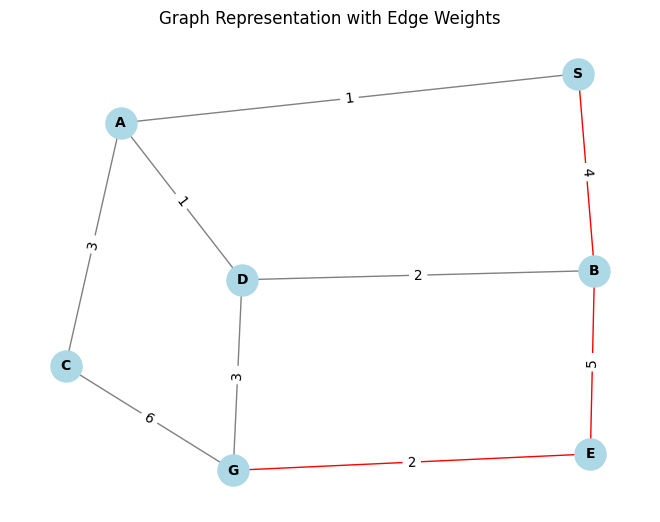

In [ ]:
import heapq

def best_first_search(start, goal): 
    open_list = [] 
    heapq.heappush(open_list, (heuristic[start], start, 0))  # Include path cost as the third element
    closed_list = set() 
    path_cost = {start: 0}  # Track the accumulated cost of the path
    came_from = {start: None}  # To reconstruct the path
    
    while open_list: 
        # Pop node with the smallest heuristic value 
        h, current, current_cost = heapq.heappop(open_list) 
 
        if current == goal:  # Goal check 
            # Reconstruct path
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            return path[::-1], current_cost  # Return path and total cost

        closed_list.add(current) 
        for neighbor, cost in graph[current]: 
            if neighbor not in closed_list: 
                new_cost = current_cost + cost  # Update cost for this neighbor
                if neighbor not in path_cost or new_cost < path_cost[neighbor]:
                    path_cost[neighbor] = new_cost
                    came_from[neighbor] = current  # Keep track of the path
                    heapq.heappush(open_list, (heuristic[neighbor], neighbor, new_cost)) 
 
    return None, 0  # Goal not reachable

# Execute the search
path, total_cost = best_first_search('S', 'G')

# Print the results
if path:
    print("Path found:", " -> ".join(path))
    print("Total cost:", total_cost)
else:
    print("Goal not reachable.")

# Draw the graph
pos = nx.spring_layout(G)
edge_colors = ['red' if (u, v) in zip(path, path[1:]) or (v, u) in zip(path, path[1:]) else 'gray' for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Representation with Edge Weights")
plt.show()

<h3>A* Search</h3>

Path found: S -> A -> D -> G -> Goal reached!
Total cost: 5


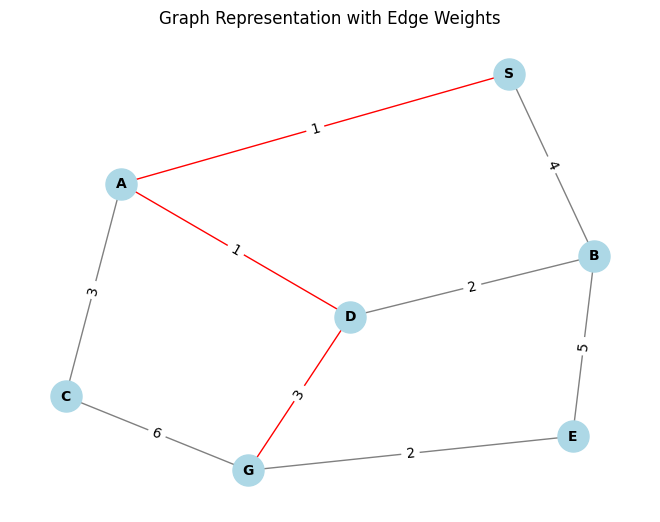

In [ ]:
import heapq 
 
def a_star_search(start, goal): 
    open_list = [] 
    heapq.heappush(open_list, (heuristic[start], 0, start, []))
    closed_list = set() 

    while open_list: 
        f, g, current, path = heapq.heappop(open_list) 
        path = path + [current]
        if current == goal:
            return path, g
        closed_list.add(current) 
        for neighbor, cost in graph[current]: 
            if neighbor not in closed_list: 
                g_new = g + cost  
                f_new = g_new + heuristic[neighbor]
                heapq.heappush(open_list, (f_new, g_new, neighbor, path)) 

    return None, 0

path, total_cost = a_star_search('S', 'G')

if path:
    print("Path found:", " -> ".join(path), "-> Goal reached!")
    print("Total cost:", total_cost)
else:
    print("Goal not reachable.")

pos = nx.spring_layout(G)
edge_colors = ['red' if (u, v) in zip(path, path[1:]) or (v, u) in zip(path, path[1:]) else 'gray' for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Representation with Edge Weights")
plt.show()

<h3>Maze Solver</h3>

In [ ]:
import heapq

def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def best_first_search_maze(maze, start, goal):
    open_list = []
    heapq.heappush(open_list, (0, start[0], start[1], []))  # (heuristic, x, y, path)
    closed_list = set()
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while open_list:
        h, x, y, path = heapq.heappop(open_list)
        if (x, y) == goal:
            return path + [(x, y)]
        closed_list.add((x, y))
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < len(maze) and 0 <= new_y < len(maze[0]) and (new_x, new_y) not in closed_list:
                if maze[new_x][new_y] == 0:  # Open path
                    h_new = manhattan_distance(new_x, new_y, goal[0], goal[1])
                    heapq.heappush(open_list, (h_new, new_x, new_y, path + [(x, y)]))
    
    return None

maze = [
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 0, 0],
]

start = (0, 0)  
goal = (0, 3)   

path = best_first_search_maze(maze, start, goal)

if path:
    print("Path found:", path)
else:
    print("No path found.")


Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3)]
